In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [69]:
#loading dataset
df = pd.read_csv('/content/house-prices.csv')

In [70]:
# Inspect Dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         128 non-null    int64 
 1   Size          128 non-null    int64 
 2   Bedrooms      128 non-null    int64 
 3   Bathrooms     128 non-null    int64 
 4   Offers        128 non-null    int64 
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB
None
               Price         Size    Bedrooms   Bathrooms      Offers
count     128.000000   128.000000  128.000000  128.000000  128.000000
mean   130427.343750  2000.937500    3.023438    2.445312    2.578125
std     26868.770371   211.572431    0.725951    0.514492    1.069324
min     69100.000000  1450.000000    2.000000    2.000000    1.000000
25%    111325.000000  1880.000000    3.000000    2.000000    2.000000
50%    125950.000000  2000.000000    3.0000

In [71]:
print(df.columns)

Index(['Price', 'Size', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')


In [72]:
df.rename(columns={'SqFt': 'Size'}, inplace=True)

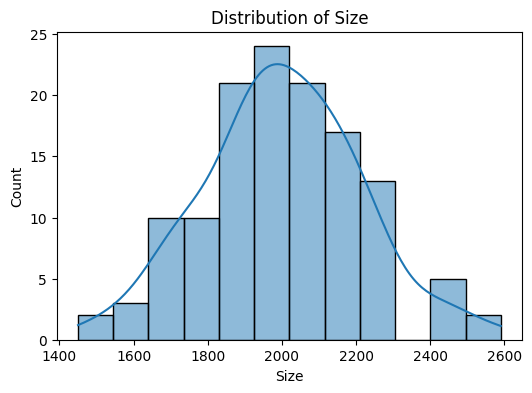

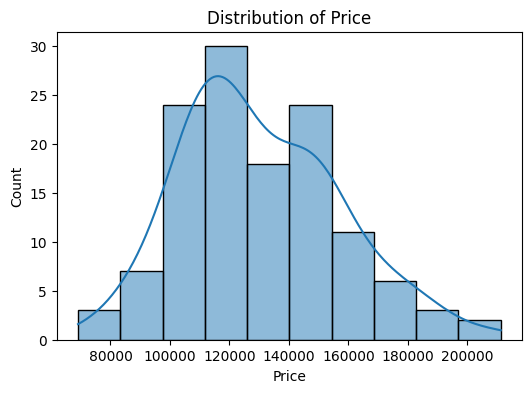

In [73]:
# Analyze Distributions
numerical_columns = ['Size', 'Price']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

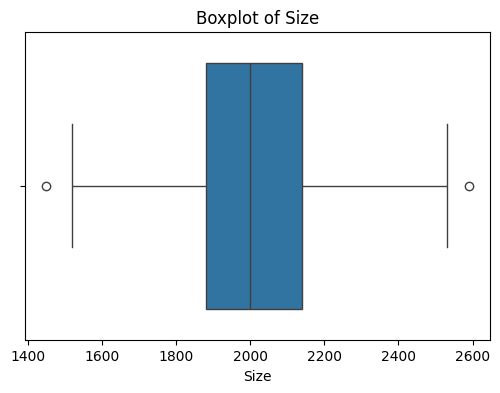

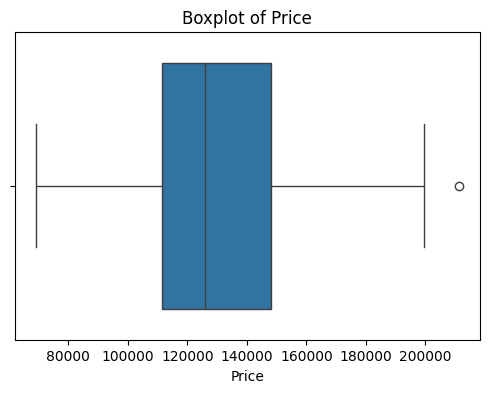

In [74]:
# Identify Outliers using Boxplots
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [75]:
# Select numerical columns to scale
scaler = MinMaxScaler()
df[['Size', 'Bedrooms']] = scaler.fit_transform(df[['Size', 'Bedrooms']])

# Display first few rows after scaling
print(df[['Size', 'Bedrooms']].head())

       Size  Bedrooms
0  0.298246  0.000000
1  0.508772  0.666667
2  0.254386  0.333333
3  0.464912  0.333333
4  0.596491  0.333333


In [76]:
# One-Hot Encode Neighborhood (Non-Ordinal Category)
encoder = OneHotEncoder(drop='first', sparse_output=False)
neighborhood_encoded = encoder.fit_transform(df[['Neighborhood']])

In [77]:
# Convert to DataFrame and merge
neighborhood_df = pd.DataFrame(neighborhood_encoded, columns=encoder.get_feature_names_out(['Neighborhood']))
df = pd.concat([df, neighborhood_df], axis=1).drop(columns=['Neighborhood'])

In [78]:
# Encode Brick (Binary Category: Yes/No → 1/0)
df['Brick'] = df['Brick'].map({'Yes': 1, 'No': 0})
# Display first few rows after encoding
print(df.head())

    Price      Size  Bedrooms  Bathrooms  Offers  Brick  Neighborhood_North  \
0  114300  0.298246  0.000000          2       2      0                 0.0   
1  114200  0.508772  0.666667          2       3      0                 0.0   
2  114800  0.254386  0.333333          2       1      0                 0.0   
3   94700  0.464912  0.333333          2       3      0                 0.0   
4  119800  0.596491  0.333333          3       3      0                 0.0   

   Neighborhood_West  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


In [79]:
# Compute correlation matrix
correlation_matrix = df.corr()
# Sort correlations with 'Price' in descending order
price_corr = correlation_matrix["Price"].sort_values(ascending=False)
print(price_corr)

Price                 1.000000
Neighborhood_West     0.714007
Size                  0.552982
Bedrooms              0.525926
Bathrooms             0.523258
Brick                 0.452817
Offers               -0.313636
Neighborhood_North   -0.548221
Name: Price, dtype: float64


In [80]:
# Set a threshold for low correlation (e.g., |corr| < 0.1)
low_impact_features = price_corr[abs(price_corr) < 0.1].index
df.drop(columns=low_impact_features, inplace=True)

In [81]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Price"])
y = df["Price"]

# Split dataset (80% train, 20% test), ensuring reproducibility with random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [67800.02256145 11072.31324966  6965.06409477 -8551.75559375
 16781.70910146  1469.26905119 22087.49519328]
Intercept: 86335.6750216839


In [83]:
y_pred = model.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 10685.05584704818


In [84]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8062934622232133


In [85]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test data
y_pred = model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Root Mean Square Error (RMSE): 10685.05584704818
R² Score: 0.8062934622232133


In [86]:
# Feature Importance (Coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
              Feature   Coefficient
0                Size  67800.022561
6   Neighborhood_West  22087.495193
4               Brick  16781.709101
1            Bedrooms  11072.313250
2           Bathrooms   6965.064095
5  Neighborhood_North   1469.269051
3              Offers  -8551.755594
